# Trabalho Final de Machine Learning Aplicado 1

Alunos:
*   Gian Giovanni Rodrigues da Silva
*   Jessyca Jordanna Barroso de Moraes
*   Tammy Hikari Yanai Gusmão
*   Thalita Naiara Andre Alves



**73 columns were dropped as they have more than 50% of their data being NA.**


## Bibliotecas Utilizadas

In [ ]:
#!pip install shap

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from matplotlib import colors as mcolors
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

# 1 - Carregando o Dataset
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#paths
path_Dados_Teste = '/content/drive/Shareddrives/ml_aplicado_1/Dados_Teste.csv'
path_Dados_Treino = '/content/drive/Shareddrives/ml_aplicado_1/Dados_Treino.csv'
path_Template_Submissao = '/content/drive/Shareddrives/ml_aplicado_1/Template_Submissao.csv'
path_Dicionario_de_Dados =  '/content/drive/Shareddrives/ml_aplicado_1/Dicionario_de_Dados.csv'

In [ ]:
df_teste = pd.read_csv(path_Dados_Teste)

df_treino = pd.read_csv(path_Dados_Treino)

In [ ]:
df_teste.head(2)

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,...,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,206833,19,37.0,27.109375,0,Caucasian,F,160.0,Floor,Floor,653,admit,Med-Surg ICU,4.277083,0,69.4,NaN,109.0,108.01,0,0,NaN,30.0,1.56,NaN,4.0,6.0,0.0,5.0,84.0,118.0,23.3,0,128.0,NaN,NaN,NaN,NaN,6.0,134.0,...,NaN,NaN,NaN,NaN,NaN,1.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
1,273200,86,47.0,28.071089,1,Caucasian,M,164.0,Operating Room,Operating Room / Recovery,1035,admit,CCU-CTICU,0.340278,0,75.5,NaN,308.0,1207.01,1,0,NaN,12.0,0.65,0.8,4.0,4.0,0.0,1.0,173.0,93.0,28.6,1,51.0,45.0,45.0,95.0,7.29,28.0,137.0,...,24.0,10.9,10.9,31.8,27.0,1.1,1.1,NaN,NaN,174.0,174.0,4.4,4.3,138.0,137.0,13.9,13.9,57.0,41.0,7.31,7.17,110.0,70.0,180.0,110.0,57.0,45.0,7.29,7.17,110.0,70.0,118.75,110.0,0,0,0,0,0,0,0


In [ ]:
df_treino.head(2)

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,...,11.3,11.3,36.9,36.9,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.0,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0,0,0,0,0,0,0,1


# 2 - Explorando o dataset
---

In [ ]:
#pd.set_option("display.max.columns", None)
#pd.set_option('display.max_rows', None)

## 2.1 Dados de Treino

In [ ]:
df_treino.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,...,11.3,11.3,36.9,36.9,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0,0,0,0,0,0,0,1
2,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0,68.0,NaN,NaN,NaN,NaN,37.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
3,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,30.0,30.0,142.0,7.39,4.0,NaN,...,11.6,11.6,34.0,34.0,1.6,1.1,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.8,8.8,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,0,0,0,0,0,0,0,0
4,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0,601.01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0,103.0,NaN,NaN,NaN,NaN,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117141 entries, 0 to 117140
Columns: 180 entries, encounter_id to diabetes_mellitus
dtypes: float64(157), int64(17), object(6)
memory usage: 160.9+ MB


### 2.1.1 Correlação entre variáveis

In [ ]:
def inspect_missing_data(df, data_type = "Train"):
    '''Insect missing patterns from data to assess next steps.'''
    
    print("--- {} ---".format(data_type))
    
    missing_data = df.isna().sum().reset_index().sort_values(by=0, ascending=False)
    no_missing = missing_data[missing_data[0] != 0].shape[0]
    total_cols = df.shape[1]
    total_rows = df.shape[0]
    
    missing_data.columns = ["name", "missing appearences"]
    missing_data["%missing from total"] = missing_data[missing_data["missing appearences"]!=0]["missing appearences"]/total_rows
    
    too_much_miss = missing_data[missing_data["%missing from total"] > 0.5].shape[0]
    to_drop = missing_data[missing_data["%missing from total"] > 0.5]["name"].values
    
    print("There are {}/{} columns with missing data.".format(no_missing, total_cols))
    print("There are {}/{} columns with more than 50% missing data (these columns will be dropped)".format(too_much_miss,
                                                                                                           no_missing))
    
    return missing_data, to_drop

In [ ]:
missing_data = df_treino.isna().sum().reset_index().sort_values(by=0, ascending=False)
no_missing = missing_data[missing_data[0] != 0].shape[0]
total_cols = df_treino.shape[1]
total_rows = df_treino.shape[0]

In [ ]:
missing_data.columns = ["name", "missing appearences"]
missing_data["%missing from total"] = missing_data[missing_data["missing appearences"]!=0]["missing appearences"]/total_rows
missing_data

,name,missing appearences,%missing from total
128,h1_bilirubin_max,107868,0.920839
129,h1_bilirubin_min,107868,0.920839
126,h1_albumin_max,107083,0.914138
127,h1_albumin_min,107083,0.914138
146,h1_lactate_max,106616,0.910151
...,...,...,...
12,icu_type,0,NaN
11,icu_stay_type,0,NaN
10,icu_id,0,NaN
4,elective_surgery,0,NaN


In [ ]:
too_much_miss = missing_data[missing_data["%missing from total"] > 0.5].shape[0]
too_much_miss

73

In [ ]:
to_drop = missing_data[missing_data["%missing from total"] > 0.5]["name"].values
to_drop

array(['h1_bilirubin_max', 'h1_bilirubin_min', 'h1_albumin_max',
       'h1_albumin_min', 'h1_lactate_max', 'h1_lactate_min',
       'h1_pao2fio2ratio_min', 'h1_pao2fio2ratio_max',
       'h1_arterial_ph_max', 'h1_arterial_ph_min', 'h1_arterial_pco2_min',
       'h1_arterial_pco2_max', 'h1_arterial_po2_max',
       'h1_arterial_po2_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_wbc_max',
       'h1_wbc_min', 'h1_calcium_min', 'h1_calcium_max',
       'h1_platelets_min', 'h1_platelets_max', 'h1_bun_max', 'h1_bun_min',
       'h1_diasbp_invasive_min', 'h1_diasbp_invasive_max',
       'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min',
       'h1_mbp_invasive_min', 'h1_mbp_invasive_max', 'h1_creatinine_max',
       'h1_creatinine_min', 'h1_hematocrit_max', 'h1_hematocrit_min',
       'h1_hemaglobin_min', 'h1_hemaglobin_max', 'h1_sodium_min',
       'h1_sodium_max', 'h1_potassium_max', 'h1_potassium_min',
       'fio2_apache', 'ph_apache', 'paco2_apache', 'paco2_for_ph_apache',
       'pao2_apache'

In [ ]:
print("There are {}/{} columns with missing data.".format(no_missing, total_cols))
print("There are {}/{} columns with more than 50% missing data (these columns will be dropped)".format(too_much_miss,no_missing))

There are 160/180 columns with missing data.
There are 73/160 columns with more than 50% missing data (these columns will be dropped)


In [ ]:
_, to_drop_train = inspect_missing_data(df=df_treino, data_type="Train")
_, to_drop_test = inspect_missing_data(df=df_teste, data_type="Test")

--- Train ---
There are 160/180 columns with missing data.
There are 73/160 columns with more than 50% missing data (these columns will be dropped)
--- Test ---
There are 160/179 columns with missing data.
There are 73/160 columns with more than 50% missing data (these columns will be dropped)


In [ ]:
df_treino_aux = df_treino.drop(labels=to_drop_test, axis=1)
df_teste_aux = df_teste.drop(labels=to_drop_test, axis=1)

In [ ]:
to_drop = ['encounter_id','hospital_id', 'icu_id']
df_treino_aux.drop(labels=to_drop, axis=1, inplace=True)
df_teste_aux.drop(labels=to_drop, axis=1, inplace=True)

In [ ]:
# Select all columns with type == "object"
train_cols = [col for col in df_treino_aux.columns if df_treino_aux[col].dtype == 'object']
test_cols = [col for col in df_teste_aux.columns if df_teste_aux[col].dtype == 'object']
string_cols = list(set(train_cols+test_cols))
if True:
    print("Train: {} columns to encode.".format(len(train_cols)), "\n"
          "Test: {} columns to encode.".format(len(test_cols)), "\n")

Train: 6 columns to encode. 
Test: 6 columns to encode. 



In [ ]:
for df, cols in zip([df_treino_aux, df_teste_aux], [train_cols, test_cols]):
  for col in cols:
    encoder = LabelEncoder()
    
    ### select all values to encode but NAs (we'll impute these later)
    fit_by = pd.Series([i for i in df[col].unique() if type(i) == str])
    encoder.fit_transform(fit_by)

    ### encode the column, leaving NAs untouched
    df[col] = df[col].apply(lambda x: encoder.transform([x])[0] if type(x) == str else x)

In [ ]:
values = df_treino_aux.values

In [ ]:
df_treino_aux

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,...,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,68.0,22.732803,0,2.0,1.0,180.3,4.0,1.0,0,2,0.541667,0,73.9,113.0,502.01,0,0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,36.0,134.0,39.3,NaN,0,14.1,68.0,37.0,68.0,37.0,119.0,72.0,...,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,39.5,37.5,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0,0,0,0,0,0,0,1
1,77.0,27.421875,0,2.0,0.0,160.0,4.0,1.0,0,5,0.927778,0,70.2,108.0,203.01,0,0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,33.0,145.0,35.1,NaN,1,12.7,95.0,31.0,95.0,31.0,118.0,72.0,...,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,36.3,36.3,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0,0,0,0,0,0,0,1
2,25.0,31.952749,0,2.0,0.0,172.7,3.0,0.0,0,5,0.000694,0,95.3,122.0,703.03,0,0,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0,68.0,37.0,NaN,36.7,NaN,0,NaN,88.0,48.0,88.0,48.0,96.0,68.0,...,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,36.7,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
3,81.0,22.635548,1,2.0,0.0,165.1,8.0,2.0,0,2,0.000694,0,61.7,203.0,1206.03,1,0,NaN,NaN,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,4.0,NaN,34.8,NaN,1,8.0,48.0,42.0,48.0,42.0,116.0,92.0,...,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,35.6,34.8,NaN,NaN,NaN,NaN,NaN,NaN,185.0,88.0,NaN,NaN,11.6,8.9,34.0,25.9,198.0,43.0,5.0,3.5,NaN,NaN,9.0,8.0,0,0,0,0,0,0,0,0
4,19.0,NaN,0,2.0,1.0,188.0,NaN,0.0,0,5,0.073611,0,NaN,119.0,601.01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0,103.0,16.0,NaN,36.7,NaN,0,NaN,99.0,57.0,99.0,57.0,89.0,60.0,...,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117136,50.0,20.324301,1,0.0,0.0,165.1,8.0,2.0,0,2,0.000000,0,55.4,305.0,1703.02,1,0,7.0,0.73,1.0,5.0,0.0,1.0,182.0,62.0,26.0,1,114.0,14.0,143.0,34.9,5039.9712,1,7.5,72.0,52.0,72.0,52.0,104.0,48.0,...,17.0,14.0,100.0,100.0,113.0,111.0,113.0,111.0,NaN,NaN,8.0,7.0,7.3,6.3,0.86,0.73,182.0,121.0,20.0,20.0,8.3,8.2,26.0,26.0,273.0,113.0,5.1,4.6,143.0,140.0,8.9,7.5,0,0,0,0,0,0,0,0
117137,50.0,29.287256,0,2.0,1.0,175.3,3.0,0.0,0,3,0.023611,0,90.0,110.0,104.01,0,0,NaN,NaN,4.0,6.0,0.0,5.0,NaN,106.0,NaN,0,120.0,50.0,NaN,36.2,1751.1552,0,NaN,102.0,82.0,102.0,82.0,101.0,89.0,...,40.0,22.0,97.0,88.0,161.0,134.0,161.0,134.0,36.6,36.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
# Dropando colunas ID's
#dataset = df_treino.copy()
#dataset.drop(columns = ['encounter_id', 'hospital_id', 'icu_id'], inplace = True)

In [ ]:
# Calculando a correlação
#correlacoes = dataset.corr('spearman')
#cor_variaveis = correlacoes['diabetes_mellitus'][(correlacoes['diabetes_mellitus'] > 0.1) & (correlacoes['diabetes_mellitus'] < 1)]

In [ ]:
#cor_variaveis

In [ ]:
#cor_variaveis.index

In [ ]:
#df_treino_aux = df_treino[['bmi', 'weight', 'arf_apache', 'bun_apache', 'creatinine_apache', 
#                           'glucose_apache', 'd1_bun_max', 'd1_bun_min', 'd1_creatinine_max', 
#                           'd1_creatinine_min', 'd1_glucose_max', 'h1_bun_max', 'h1_bun_min', 
#                           'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max', 
#                           'h1_glucose_min', 'diabetes_mellitus']].copy()

In [ ]:
#df_treino_aux

### 2.2.2 Valores Nulos

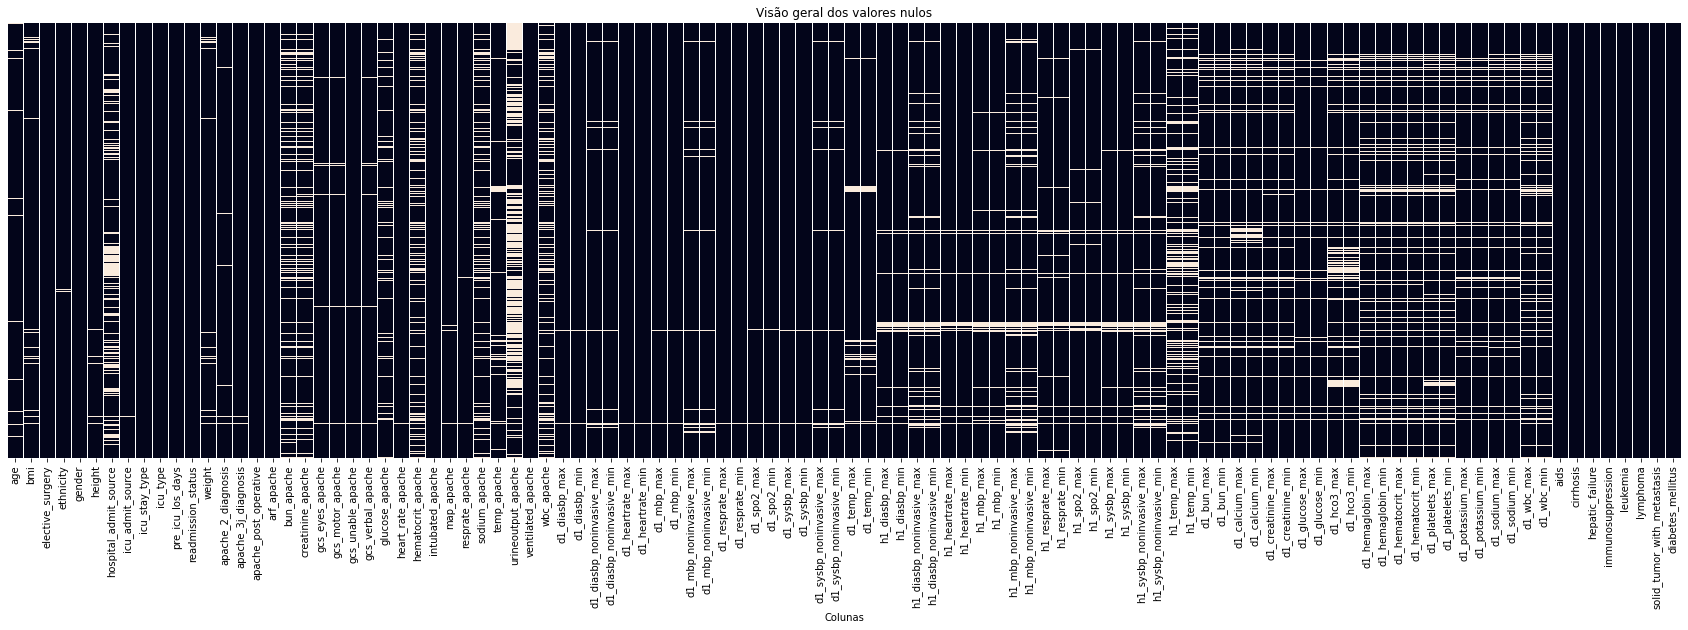

In [ ]:
# Visualizando valores nulos por coluna
plt.figure(figsize = (30,8))

sns.heatmap(df_treino_aux.isnull(),
            yticklabels = 0,
            cbar = False)

plt.title('Visão geral dos valores nulos')
plt.xlabel('Colunas')
plt.show()

### 2.1.3 Estatísticas Descritivas

In [ ]:
# Estatísticas descritivas de todas as colunas do DF
df_treino_aux.describe(include = 'all')  

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,...,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,112658.000000,113098.000000,117141.000000,115732.00000,117084.000000,115268.000000,87278.000000,116929.000000,117141.000000,117141.000000,117141.000000,117141.0,114019.000000,115624.000000,116363.000000,117141.000000,117141.000000,94322.000000,94779.000000,115178.000000,115178.000000,116511.000000,115178.000000,103956.000000,116873.000000,93135.000000,117141.000000,116777.000000,116408.000000,95115.000000,111241.000000,60254.000000,117141.000000,90701.000000,116905.000000,116905.000000,115689.000000,115689.000000,116915.000000,116915.000000,...,111324.000000,111324.000000,111504.000000,111504.000000,112183.000000,112183.000000,106949.000000,106949.000000,90447.000000,90447.000000,104805.000000,104805.000000,102141.000000,102141.000000,105204.000000,105204.000000,109754.000000,109754.000000,99093.000000,99093.000000,102554.000000,102554.000000,103141.000000,103141.000000,100443.000000,100443.000000,105853.000000,105853.000000,105207.000000,105207.000000,101489.000000,101489.000000,117141.000000,117141.000000,117141.000000,117141.000000,117141.000000,117141.000000,117141.000000,117141.000000
mean,61.990911,29.108791,0.189609,1.96739,0.542098,169.608277,4.625289,0.689743,0.078359,4.312051,0.840681,0.0,83.783195,185.448973,565.888574,0.207058,0.027983,25.708483,1.480966,3.487098,5.483929,0.011441,4.028894,159.994442,99.858659,32.970069,0.156222,87.174911,25.140068,137.944758,36.420846,1800.950498,0.330713,12.181481,88.588307,49.861263,88.738272,49.913518,103.299816,70.406680,...,22.538060,17.081240,98.096140,95.246942,133.276735,115.960689,133.076709,116.103311,36.723099,36.613907,25.571505,23.549491,8.379489,8.163861,1.493221,1.363453,174.076444,114.448084,24.458040,23.193749,11.460179,10.901712,34.554426,32.935769,205.850642,194.886712,4.252649,3.928593,139.150318,137.689675,12.539327,11.297301,0.001041,0.016109,0.013795,0.025439,0.007282,0.004098,0.020710,0.216440
std,16.819622,8.279498,0.391993,0.97831,0.498227,10.841998,3.212823,0.928875,0.381801,1.805956,2.461198,0.0,25.015740,85.847843,466.477434,0.405199,0.164926,20.695235,1.545518,0.940466,1.271748,0.106349,1.539188,90.526343,30.762695,6.834349,0.363067,41.896179,15.016604,5.306728,0.858129,1459.928264,0.470472,6.928058,20.181941,13.412061,20.176195,13.443714,22.006315,17.159797,...,7.443584,5.946577,3.140255,6.485513,27.466734,26.316050,27.586540,26.422826,0.773463,0.796857,20.495012,18.704232,0.741253,0.794241,1.528127,1.343419,86.366855,38.257669,4.363364,4.995105,2.149423,2.338571,6.192354,6.806283,89.632025,88.204660,0.667419,0.580029,4.827683,4.926877,6.784044,5.925088,0.032255,0.125895,0.116641,0.157456,0.085023,0.063882,0.142413,0.411819
min,0.000000,14.844926,0.000000,0.00000,0.000000,137.200000,0.000000,0.000000,0.000000,0.000000,-0.250000,0.0,38.600000,101.000000,0.

In [ ]:
#Q1 = df_treino_aux.quantile(0.25)
#Q3 = df_treino_aux.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)

In [ ]:
#df_treino_aux.shape

In [ ]:
#df_treino_aux[~((df_treino_aux < (Q1 - 1.5 * IQR)) | (df_treino_aux > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
#df_treino_aux = df_treino_aux[~((df_treino_aux < (Q1 - 1.5 * IQR)) | (df_treino_aux > (Q3 + 1.5 * IQR))).any(axis=1)]
#df_treino_aux_out.shape

In [ ]:
#import seaborn as sns
#sns.boxplot(x=df_treino_aux['weight'])

In [ ]:
#import seaborn as sns
#sns.boxplot(x=df_treino_aux_out['weight'])

In [ ]:
#df_treino_aux

## 2.2 Dados de Teste

In [ ]:
df_teste.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,...,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,206833,19,37.0,27.109375,0,Caucasian,F,160.0,Floor,Floor,653,admit,Med-Surg ICU,4.277083,0,69.4,NaN,109.0,108.01,0,0,NaN,30.0,1.56,NaN,4.0,6.0,0.0,5.0,84.0,118.0,23.3,0,128.0,NaN,NaN,NaN,NaN,6.0,134.0,...,NaN,NaN,NaN,NaN,NaN,1.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
1,273200,86,47.0,28.071089,1,Caucasian,M,164.0,Operating Room,Operating Room / Recovery,1035,admit,CCU-CTICU,0.340278,0,75.5,NaN,308.0,1207.01,1,0,NaN,12.0,0.65,0.8,4.0,4.0,0.0,1.0,173.0,93.0,28.6,1,51.0,45.0,45.0,95.0,7.29,28.0,137.0,...,24.0,10.9,10.9,31.8,27.0,1.1,1.1,NaN,NaN,174.0,174.0,4.4,4.3,138.0,137.0,13.9,13.9,57.0,41.0,7.31,7.17,110.0,70.0,180.0,110.0,57.0,45.0,7.29,7.17,110.0,70.0,118.75,110.0,0,0,0,0,0,0,0
2,271053,79,74.0,21.661538,0,Caucasian,F,162.5,Acute Care/Floor,Floor,366,admit,Med-Surg ICU,2.694444,0,57.2,NaN,124.0,305.02,0,0,NaN,24.0,0.46,NaN,4.0,6.0,0.0,5.0,61.0,102.0,18.5,0,48.0,NaN,NaN,NaN,NaN,14.0,144.0,...,NaN,6.3,6.3,18.5,18.5,NaN,NaN,NaN,NaN,258.0,258.0,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
3,221599,120,18.0,17.617188,0,Caucasian,F,160.0,NaN,Accident & Emergency,1000,admit,CCU-CTICU,0.102083,0,45.1,NaN,120.0,407.01,0,0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,5.0,NaN,103.0,NaN,0,54.0,NaN,NaN,NaN,NaN,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
4,177808,86,80.0,29.880373,0,Caucasian,F,162.6,Emergency Department,Accident & Emergency,1037,admit,SICU,0.114583,0,79.0,NaN,301.0,403.01,0,0,NaN,8.0,0.65,NaN,3.0,6.0,0.0,4.0,106.0,131.0,28.7,0,67.0,NaN,NaN,NaN,NaN,28.0,136.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0


In [ ]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13016 entries, 0 to 13015
Columns: 179 entries, encounter_id to solid_tumor_with_metastasis
dtypes: float64(157), int64(16), object(6)
memory usage: 17.8+ MB


In [ ]:
# Manter apenas as colunas com correlação entre 0.1 e 1
#df_teste_aux = df_teste[['bmi', 'weight', 'arf_apache', 'bun_apache', 'creatinine_apache', 
#                         'glucose_apache', 'd1_bun_max', 'd1_bun_min', 'd1_creatinine_max', 
#                         'd1_creatinine_min', 'd1_glucose_max', 'h1_bun_max', 'h1_bun_min', 
#                         'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min']]\
#               .copy()

In [ ]:
#df_teste_aux

### 2.2.1 Valores Nulos

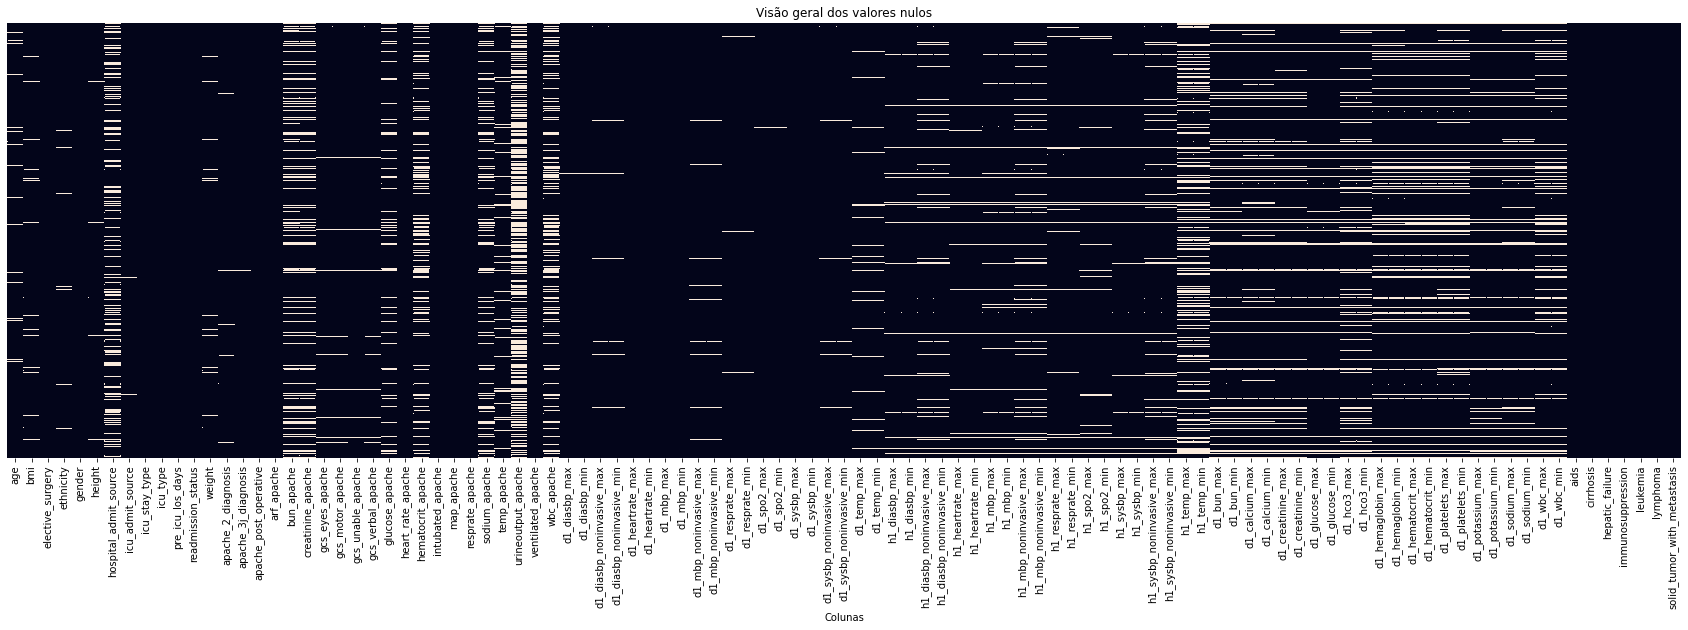

In [ ]:
# Visualizando valores nulos por coluna
plt.figure(figsize = (30,8))

sns.heatmap(df_teste_aux.isnull(),
            yticklabels = 0,
            cbar = False)

plt.title('Visão geral dos valores nulos')
plt.xlabel('Colunas')
plt.show()

### 2.2.2 Estatísticas Descritivas

In [ ]:
# Estatísticas descritivas de todas as colunas do DF
df_teste_aux.describe(include = 'all')

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,...,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,12511.000000,12569.000000,13016.000000,12838.000000,13007.000000,12812.000000,9681.000000,12988.000000,13016.000000,13016.000000,13016.000000,13016.0,12675.000000,12848.000000,12929.000000,13016.000000,13016.000000,10424.000000,10496.000000,12789.000000,12789.000000,12937.000000,12789.000000,11505.000000,12975.000000,10264.000000,13016.000000,12960.000000,12941.000000,10523.000000,12305.000000,6736.000000,13016.000000,9981.000000,12975.000000,12975.000000,12832.000000,12832.000000,12980.000000,12980.000000,...,11685.000000,12379.000000,12379.000000,12411.000000,12411.000000,12455.000000,12455.000000,11878.000000,11878.000000,10007.000000,10007.000000,11618.000000,11618.000000,11324.000000,11324.000000,11680.000000,11680.000000,12160.000000,12160.000000,11017.000000,11017.000000,11371.000000,11371.000000,11428.000000,11428.000000,11157.000000,11157.000000,11758.000000,11758.000000,11680.000000,11680.000000,11239.000000,11239.000000,13016.000000,13016.000000,13016.000000,13016.000000,13016.000000,13016.000000,13016.000000
mean,62.032851,29.123474,0.191918,1.954510,0.541785,169.597697,4.243983,0.686788,0.079748,4.284342,0.833205,0.0,83.862256,185.886052,566.945813,0.207591,0.028119,25.804825,1.487621,3.499023,5.492924,0.011440,4.041989,161.469431,99.817341,33.027972,0.160264,87.356455,25.245367,137.949796,36.418761,1799.487772,0.327904,12.243834,88.460270,49.878536,88.648847,49.953320,103.269569,70.425193,...,78.936557,22.592697,17.111237,98.103779,95.322617,133.135126,115.873545,132.900909,115.892490,36.718062,36.614480,25.644689,23.596217,8.382427,8.172006,1.496328,1.366875,174.811924,114.370148,24.406381,23.179704,11.456486,10.899499,34.568533,32.971159,206.265304,195.183226,4.256685,3.935224,139.141610,137.715676,12.542795,11.310002,0.000922,0.015827,0.011832,0.027735,0.007529,0.004994,0.022127
std,16.852811,8.111063,0.393824,0.966262,0.498270,10.752982,2.582877,0.925743,0.386203,1.837557,2.692954,0.0,24.484960,85.953779,466.828471,0.405598,0.165320,20.643772,1.525574,0.934065,1.264658,0.106349,1.532579,92.260767,30.731919,6.836752,0.366865,42.016716,15.097875,5.277910,0.852679,1426.095984,0.469468,6.958007,19.989914,13.262567,19.970584,13.283375,21.772086,16.980236,...,18.795985,7.421123,5.814315,2.870090,6.309747,27.320069,26.314651,27.453903,26.416703,0.776304,0.796855,20.504942,18.746027,0.729633,0.782277,1.505817,1.325579,88.142048,37.856349,4.379515,5.046928,2.147403,2.333424,6.215253,6.807172,88.785805,87.375342,0.662650,0.574299,4.828573,4.920665,6.772213,5.920775,0.030351,0.124809,0.108132,0.164219,0.086447,0.070493,0.147101
min,0.000000,14.844926,0.000000,0.000000,0.000000,137.200000,0.000000,0.000000,0.000000,0.000000,-0.172917,0.0,38.600000,101.000000,0.090000,0.000000,0.000000,4.000000,0.300000,1.000000,1.000000,

# 3 - Modelos

Preparação dos dados para criação e aplicação dos modelos.

In [ ]:
lista = list(df_treino_aux.columns)
lista.pop()

'diabetes_mellitus'

In [ ]:
def fill_nans(_series):
  sum = _series.isnull().sum()
  #print(_series.name)
  #print(sum)

  if sum > 0:
    if _series.dtype == 'float64':
      #print(_series.median())
      return ( _series.fillna(_series.median())  )
    elif _series.dtype == 'object':
      return ( _series.fillna("Uninformed"))
    else: #int64
      return ( _series.fillna(st.mode(_series) ))
  else: #series passada não tem dados faltantes
    return _series

In [ ]:
for col in lista:
  df_treino_aux[col] = fill_nans(df_treino_aux[col])
  df_teste_aux[col] = fill_nans(df_teste_aux[col])

In [ ]:
def discretize_numeric_att(_df, _column):
  df_aux = _df[_column]

  if df_aux.dtype == 'object':
    df_aux = df_aux.astype(int)
  
  if np.max(df_aux) != 0:
      return df_aux / np.max(df_aux)
  else:
    return df_aux

In [ ]:
for col in lista:
  df_treino_aux[col] = discretize_numeric_att(df_treino_aux,col)
  df_teste_aux[col] = discretize_numeric_att(df_teste_aux,col)

In [ ]:
# Trocando NaN por 0.0, em colunas do tipo float no df_treino_aux
#for col in df_treino_aux.select_dtypes('float'):
  #media = float(np.mean(df_treino_aux[col]))
  #print(media)
  #df_treino_aux[col] = df_treino_aux[col].fillna(media)
  #df_treino_aux[col] = df_treino_aux[col].fillna(0.0)

In [ ]:
df_treino_aux.head(2)

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,...,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,0.764045,0.335218,0.0,0.4,1.0,0.921826,0.285714,0.25,0.0,0.285714,0.003084,0,0.397312,0.366883,0.228078,0.0,0.0,0.244094,0.224508,0.75,1.0,0.0,0.8,0.280608,0.662921,0.533074,0.0,0.20,0.60,0.848101,0.989924,0.166839,0.0,0.307860,0.412121,0.411111,0.412121,0.411111,0.672316,0.411429,...,0.440678,0.095238,1.00,0.74,0.587444,0.592784,0.587444,0.589744,1.000000,0.954198,0.246032,0.265275,0.787037,0.718447,0.225923,0.224393,0.274959,0.378472,0.475,0.384615,0.517442,0.532934,0.532039,0.548,0.398291,0.417975,0.571429,0.586207,0.860759,0.875817,0.305990,0.344760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.865169,0.404363,0.0,0.4,0.0,0.818038,0.285714,0.25,0.0,0.714286,0.005283,0,0.377419,0.350649,0.092233,0.0,0.0,0.070866,0.050089,0.25,0.5,0.0,0.2,0.242191,0.674157,0.717899,0.0,0.23,0.55,0.917722,0.884131,0.166839,1.0,0.277293,0.575758,0.344444,0.575758,0.344444,0.666667,0.411429,...,0.525424,0.148148,0.95,0.70,0.426009,0.365979,0.426009,0.364103,0.918987,0.923664,0.087302,0.079583,0.796296,0.776699,0.063906,0.056350,0.237316,0.444444,0.675,0.666667,0.656977,0.664671,0.716505,0.722,0.952137,0.873621,0.600000,0.655172,0.917722,0.947712,0.505642,0.310529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
# Trocando NaN por 0.0, em colunas do tipo float no df_teste_aux
#for col in df_teste_aux.select_dtypes('float'):
  #media = float(np.mean(df_teste_aux[col]))
  #print(media)
  #df_teste_aux[col] = df_teste_aux[col].fillna(media)
  #df_teste_aux[col] = df_teste_aux[col].fillna(0.0)

In [ ]:
df_teste_aux.head(2)

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,...,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,0.41573,0.399755,0.0,0.4,0.0,0.818038,0.333333,0.25,0.0,0.714286,0.026885,0,0.373118,0.353896,0.049072,0.0,0.0,0.236220,0.139535,1.0,1.000000,0.0,1.0,0.140304,0.662921,0.453307,0.0,0.640,0.100000,0.848101,0.919395,0.167786,0.0,0.555895,0.703030,0.855556,0.703030,0.855556,0.632768,0.503356,...,0.811594,0.322034,0.15,0.98,0.97,0.704036,0.768041,0.704036,0.764103,0.926835,0.931552,0.238095,0.265275,0.777778,0.796117,0.140414,0.156975,0.183306,0.291667,0.475,0.487179,0.534884,0.461078,0.549515,0.466,0.403419,0.364158,0.742857,0.896552,0.848101,0.875817,0.552517,0.595628,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.52809,0.413936,1.0,0.4,1.0,0.838489,0.583333,0.50,0.0,0.000000,0.002139,0,0.405914,1.000000,0.548379,1.0,0.0,0.094488,0.058140,1.0,0.666667,0.0,0.2,0.288959,0.522472,0.556420,1.0,0.255,0.466667,0.867089,0.916877,0.447677,1.0,0.303493,0.387879,0.544444,0.387879,0.544444,0.514124,0.489933,...,0.565217,0.322034,0.20,1.00,0.98,0.569507,0.432990,0.582960,0.584615,0.926582,0.926209,0.095238,0.088425,0.750000,0.776699,0.075608,0.065406,0.283142,0.343750,0.625,0.615385,0.633721,0.586826,0.617476,0.540,0.297436,0.301372,0.628571,0.689655,0.873418,0.895425,0.301649,0.320309,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Dividindo df_treino_aux em treino e teste
X = df_treino_aux.loc[:,'age':'solid_tumor_with_metastasis'].values
y = df_treino_aux['diabetes_mellitus'].values

## 3.1 Dados Balanceados

In [ ]:
df_treino_aux['diabetes_mellitus'].value_counts()

0    91787
1    25354
Name: diabetes_mellitus, dtype: int64

In [ ]:
# Contagem de classes
class_count_0, class_count_1 = df_treino_aux['diabetes_mellitus'].value_counts()

In [ ]:
# Separando classes
class_0 = df_treino_aux[df_treino_aux['diabetes_mellitus'] == 0]
class_1 = df_treino_aux[df_treino_aux['diabetes_mellitus'] == 1]
# print shape das classes
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (91787, 104)
class 1: (25354, 104)


#### 3.1.2 Random Under-Sampling

total class of 1 and 0:
 1    25354
0    25354
Name: diabetes_mellitus, dtype: int64


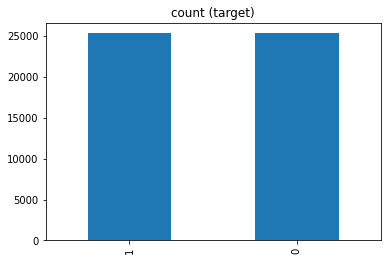

In [ ]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis = 0)

print("total class of 1 and 0:\n", test_under['diabetes_mellitus'].value_counts())

# gráfico de contagem das classes depois do under-sampeling
test_under['diabetes_mellitus'].value_counts().plot(kind = 'bar', title = 'count (target)')

In [ ]:
# Separando dados de treino
y_train_under = test_under.diabetes_mellitus
X_train_under = test_under.drop('diabetes_mellitus', axis = 1)

#### 3.1.3 Random Over-Sampling

total class of 1 and 0:
 1    91787
0    91787
Name: diabetes_mellitus, dtype: int64


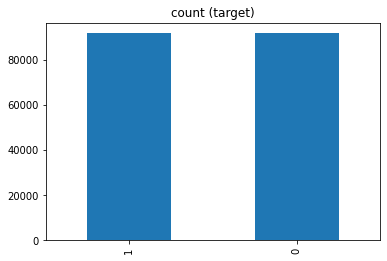

In [ ]:
class_1_over = class_1.sample(class_count_0, replace = True)

test_over = pd.concat([class_1_over, class_0], axis = 0)

print("total class of 1 and 0:\n", test_over['diabetes_mellitus'].value_counts())

# gráfico de contagem das classes depois do over-sampeling
test_over['diabetes_mellitus'].value_counts().plot(kind = 'bar', title = 'count (target)')

In [ ]:
y_train_over = test_over.diabetes_mellitus
X_train_over = test_over.drop('diabetes_mellitus', axis = 1)

## 3.2 Dados Desbalanceados

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

In [ ]:
print('Amostras de treino:')
print(f' * X_train: {X_train.shape}')
print(f' * y_train: {y_train.shape}')

print('Amostras de teste:')
print(f' * X_test: {X_test.shape}')
print(f' * y_test: {y_test.shape}')

Amostras de treino:
 * X_train: (87855, 103)
 * y_train: (87855,)
Amostras de teste:
 * X_test: (29286, 103)
 * y_test: (29286,)


## 3.3 Regressão Logística

### 3.3.1 Criação do Modelo

In [ ]:
reglog_model = LogisticRegression(max_iter=900, multi_class='multinomial', solver = 'saga', penalty='none')

In [ ]:
#reglog_model = LogisticRegression(solver = 'newton-cg', random_state = 0)

### 3.3.2 Aplicação do Modelo

#### 3.3.2.1 Em dados balanceados - Random Under-Sampling

In [ ]:
reglog_model.fit(X_train_under, y_train_under)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=900,
                   multi_class='multinomial', n_jobs=None, penalty='none',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_under, reglog_model.predict(X_train_under)), 2)}')

Acurácia (Treino): 0.75


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, reglog_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.77


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
reglog_model.score(X, y)

0.7720780939210012

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_under, reglog_model.predict_proba(X_train_under)[:, 1])

0.8266557768860492

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, reglog_model.predict_proba(X_test)[:, 1])

0.821904080425088

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = reglog_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.8905589 , 0.1094411 ],
       [0.68887467, 0.31112533],
       [0.60661204, 0.39338796],
       ...,
       [0.8108597 , 0.1891403 ],
       [0.76712046, 0.23287954],
       [0.61914654, 0.38085346]])

In [ ]:
y_pred[:,1]

array([0.1094411 , 0.31112533, 0.39338796, ..., 0.1891403 , 0.23287954,
       0.38085346])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/reg_log_trat_under_jess.csv', index = False)

#### 3.3.2.2 Em dados balanceados - Random Over-Sampling

In [ ]:
reglog_model.fit(X_train_over, y_train_over)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=900,
                   multi_class='multinomial', n_jobs=None, penalty='none',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_over, reglog_model.predict(X_train_over)), 2)}')

Acurácia (Treino): 0.75


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, reglog_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.77


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
reglog_model.score(X, y)

0.7728293253429628

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_over, reglog_model.predict_proba(X_train_over)[:, 1])

0.8238562538713782

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, reglog_model.predict_proba(X_test)[:, 1])

0.8223438400741964

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = reglog_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.88657125, 0.11342875],
       [0.67170598, 0.32829402],
       [0.59986082, 0.40013918],
       ...,
       [0.80037656, 0.19962344],
       [0.75699973, 0.24300027],
       [0.65018621, 0.34981379]])

In [ ]:
y_pred[:,1]

array([0.11342875, 0.32829402, 0.40013918, ..., 0.19962344, 0.24300027,
       0.34981379])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/reg_log_trat_over_jess.csv', index = False)

#### 3.3.2.3 Em dados desbalanceados

In [ ]:
reglog_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=900,
                   multi_class='multinomial', n_jobs=None, penalty='none',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
for f, c in zip(df_treino_aux.columns[1:], reglog_model.coef_[0].tolist()):
    print(f'{f} = {c}')

print(f'CONST = {float(reglog_model.intercept_)}')

bmi = 0.6590200655572699
elective_surgery = 0.418478098202319
ethnicity = 0.1261870220376574
gender = 0.02119113489224658
height = 0.0699452774819696
hospital_admit_source = -0.779080401568628
icu_admit_source = -0.07576317566621242
icu_stay_type = -0.03525224142084306
icu_type = -0.03458578266673858
pre_icu_los_days = -0.14333916689735268
readmission_status = 1.363587650813975
weight = 0.0
apache_2_diagnosis = 1.1863543557579814
apache_3j_diagnosis = 0.07695995169207415
apache_post_operative = -0.046554480571581104
arf_apache = -0.08840863985498786
bun_apache = 0.5476134789045646
creatinine_apache = 0.15766862439504817
gcs_eyes_apache = -0.0787464062529353
gcs_motor_apache = 0.14083789935806793
gcs_unable_apache = 0.11530675926815268
gcs_verbal_apache = -0.2536648023418417
glucose_apache = 0.0038647512727386585
heart_rate_apache = -0.6164548865779501
hematocrit_apache = -0.015549432725608452
intubated_apache = 0.024633683359926068
map_apache = -0.06408491212589906
resprate_apache = -0

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train, reglog_model.predict(X_train)), 2)}')

Acurácia (Treino): 0.81


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, reglog_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.81


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
reglog_model.score(X, y)

0.8115775006189122

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_under, reglog_model.predict_proba(X_train_under)[:, 1])

0.8224376418305218

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, reglog_model.predict_proba(X_test)[:, 1])

0.8175900044720982

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = reglog_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.95529397, 0.04470603],
       [0.87244836, 0.12755164],
       [0.84887624, 0.15112376],
       ...,
       [0.92867715, 0.07132285],
       [0.90908844, 0.09091156],
       [0.85125432, 0.14874568]])

In [ ]:
y_pred[:,1]

array([0.04470603, 0.12755164, 0.15112376, ..., 0.07132285, 0.09091156,
       0.14874568])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/reg_log_trat_jess.csv', index = False)

## 3.4 KNN - Classifier

### 3.4.1 Criação do Modelo

In [ ]:
#knn_model = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=13, weights='distance', p=1, metric='chebyshev', 
                                 leaf_size=40, algorithm='kd_tree')

### 3.4.2 Aplicação do Modelo

#### 3.4.2.1 Em dados balanceados - Random Under-Sampling

In [ ]:
knn_model.fit(X_train_under, y_train_under)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=40, metric='chebyshev',
                     n_neighbors=13, p=1, weights='distance')

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_under, knn_model.predict(X_train_under)), 2)}')

Acurácia (Treino): 1.0


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, knn_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.87


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
knn_model.score(X, y)

0.8657173833243698

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_under, knn_model.predict_proba(X_train_under)[:, 1])

1.0

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

0.9977819336319749

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = knn_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.60876076, 0.39123924],
       [0.43329877, 0.56670123],
       [0.55200032, 0.44799968],
       ...,
       [0.67066232, 0.32933768],
       [0.67983125, 0.32016875],
       [0.82785078, 0.17214922]])

In [ ]:
y_pred[:,1]

array([0.39123924, 0.56670123, 0.44799968, ..., 0.32933768, 0.32016875,
       0.17214922])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/knn_class_trat_under_jess.csv', index = False)

#### 3.4.2.2 Em dados balanceados - Random Over-Sampling

In [ ]:
knn_model.fit(X_train_over, y_train_over)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=40, metric='chebyshev',
                     n_neighbors=13, p=1, weights='distance')

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_over, knn_model.predict(X_train_over)), 2)}')

Acurácia (Treino): 1.0


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, knn_model.predict(X_test)), 2)}')

Acurácia (Teste): 1.0


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
knn_model.score(X, y)

0.9980536276794633

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_over, knn_model.predict_proba(X_train_over)[:, 1])

1.0

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

0.9992849197521055

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = knn_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.69117652, 0.30882348],
       [0.35064385, 0.64935615],
       [0.77494722, 0.22505278],
       ...,
       [0.68347761, 0.31652239],
       [0.54771948, 0.45228052],
       [0.76162306, 0.23837694]])

In [ ]:
y_pred[:,1]

array([0.30882348, 0.64935615, 0.22505278, ..., 0.31652239, 0.45228052,
       0.23837694])

In [ ]:
df_template = pd.read_csv(path_Template_Submissao)
df_template['diabetes_mellitus'] = y_pred[:,1]
df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/knn_class_trat_over_jess.csv', index = False)

#### 3.4.2.3 Em dados desbalanceados

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=40, metric='chebyshev',
                     n_neighbors=13, p=1, weights='distance')

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train, knn_model.predict(X_train)), 2)}')

Acurácia (Treino): 1.0


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, knn_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.8


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
knn_model.score(X, y)

0.9506321441681392

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train, knn_model.predict_proba(X_train)[:, 1])

1.0

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

0.746564073221381

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = knn_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[1.        , 0.        ],
       [0.64144165, 0.35855835],
       [0.85186187, 0.14813813],
       ...,
       [0.73372325, 0.26627675],
       [0.82273756, 0.17726244],
       [0.84667361, 0.15332639]])

In [ ]:
y_pred[:,1]

array([0.        , 0.35855835, 0.14813813, ..., 0.26627675, 0.17726244,
       0.15332639])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/knn_class_trat_jess.csv', index = False)

## 3.5 Árvores de Decisão

### 3.5.1 Criação do Modelo

In [ ]:
tree_model = DecisionTreeClassifier(criterion = 'entropy',
                                    max_depth = 7, 
                                    min_samples_split = 2,
                                    random_state = 0)

### 3.5.2 Aplicação do Modelo

#### 3.5.2.1 Em dados balanceados - Random Under-Sampling

In [ ]:
tree_model.fit(X_train_under, y_train_under)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_under, tree_model.predict(X_train_under)), 2)}')

Acurácia (Treino): 0.75


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, tree_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.75


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
tree_model.score(X, y)

0.7481411290666803

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_under, tree_model.predict_proba(X_train_under)[:, 1])

0.8264527621684394

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1])

0.8200379164583003

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = tree_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.92244898, 0.07755102],
       [0.42288904, 0.57711096],
       [0.39749609, 0.60250391],
       ...,
       [0.97737557, 0.02262443],
       [0.51426307, 0.48573693],
       [0.62986553, 0.37013447]])

In [ ]:
y_pred[:,1]

array([0.07755102, 0.57711096, 0.60250391, ..., 0.02262443, 0.48573693,
       0.37013447])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/arv_dec_trat_under_jess.csv', index = False)

#### 3.5.2.2 Em dados balanceados - Random Over-Sampling

In [ ]:
tree_model.fit(X_train_over, y_train_over)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_over, tree_model.predict(X_train_over)), 2)}')

Acurácia (Treino): 0.75


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, tree_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.74


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
tree_model.score(X, y)

0.7454520620448861

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_over, tree_model.predict_proba(X_train_over)[:, 1])

0.8255783601045128

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1])

0.822186771702722

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = tree_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.91853933, 0.08146067],
       [0.27892031, 0.72107969],
       [0.38247947, 0.61752053],
       ...,
       [0.9505071 , 0.0494929 ],
       [0.50369686, 0.49630314],
       [0.55227519, 0.44772481]])

In [ ]:
y_pred[:,1]

array([0.08146067, 0.72107969, 0.61752053, ..., 0.0494929 , 0.49630314,
       0.44772481])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/arv_dec_trat_over_jess.csv', index = False)

#### 3.5.2.3 Em dados desbalanceados

In [ ]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train, tree_model.predict(X_train)), 2)}')

Acurácia (Treino): 0.82


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, tree_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.81


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
tree_model.score(X, y)

0.8177154028051664

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train, tree_model.predict_proba(X_train)[:, 1])

0.8282232693281089

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1])

0.8094488564352029

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = tree_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.93730408, 0.06269592],
       [0.54883721, 0.45116279],
       [0.83747178, 0.16252822],
       ...,
       [0.99058824, 0.00941176],
       [0.86764706, 0.13235294],
       [0.85948005, 0.14051995]])

In [ ]:
y_pred[:,1]

array([0.06269592, 0.45116279, 0.16252822, ..., 0.00941176, 0.13235294,
       0.14051995])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/arv_dec_trat_jess.csv', index = False)

## 3.6 Soft Voting

### 3.6.1 Criação do Modelo

In [ ]:
tree_model = DecisionTreeClassifier(criterion = 'entropy',
                                    max_depth = 20, 
                                    min_samples_split = 2,
                                    random_state = 0)

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators = 30, 
                                             criterion = 'entropy',
                                             max_depth = 15,
                                             min_samples_split = 2,
                                             random_state = 0)

In [ ]:
soft_voting_model = VotingClassifier(estimators = [('random_forest', random_forest_model),
                                                   ('knn_model', knn_model),
                                                   ('tree_model', tree_model)], 
                                     voting = 'soft')

In [ ]:
#soft_voting_model = VotingClassifier(estimators = [('logistic_model', reglog_model),
#                                                   ('knn_model', knn_model),
#                                                   ('tree_model', tree_model)], 
#                                     voting = 'soft')

### 3.6.2 Aplicação do Modelo

#### 3.6.2.1 Em dados balanceados - Random Under-Sampling

In [ ]:
soft_voting_model.fit(X_train_under, y_train_under)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=15,
                                                     n_estimators=30,
                                                     random_state=0)),
                             ('knn_model',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   leaf_size=40,
                                                   metric='chebyshev',
                                                   n_neighbors=13, p=1,
                                                   weights='distance')),
                             ('tree_model',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=20,
                                                     random_state=0))],
                 v

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_under, soft_voting_model.predict(X_train_under)), 2)}')

Acurácia (Treino): 0.99


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, soft_voting_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.84


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
soft_voting_model.score(X, y)

0.8408243057511887

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_under, soft_voting_model.predict_proba(X_train_under)[:, 1])

0.9998883226932525

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, soft_voting_model.predict_proba(X_test)[:, 1])

0.9831302680786735

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = soft_voting_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.7874695 , 0.2125305 ],
       [0.66629134, 0.33370866],
       [0.3476434 , 0.6523566 ],
       ...,
       [0.85138719, 0.14861281],
       [0.58757076, 0.41242924],
       [0.78760066, 0.21239934]])

In [ ]:
y_pred[:,1]

array([0.2125305 , 0.33370866, 0.6523566 , ..., 0.14861281, 0.41242924,
       0.21239934])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/soft_trat_under_jess.csv', index = False)

#### 3.6.2.2 Em dados balanceados - Random Over-Sampling

In [ ]:
soft_voting_model.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=15,
                                                     n_estimators=30,
                                                     random_state=0)),
                             ('knn_model',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   leaf_size=40,
                                                   metric='chebyshev',
                                                   n_neighbors=13, p=1,
                                                   weights='distance')),
                             ('tree_model',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=20,
                                                     random_state=0))],
                 v

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_over, soft_voting_model.predict(X_train_over)), 2)}')

Acurácia (Treino): 0.99


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, soft_voting_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.98


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
soft_voting_model.score(X, y)

0.9800752938766102

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_over, soft_voting_model.predict_proba(X_train_over)[:, 1])

0.999833432115844

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, soft_voting_model.predict_proba(X_test)[:, 1])

0.9985031336511961

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = soft_voting_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.8547797 , 0.1452203 ],
       [0.62305706, 0.37694294],
       [0.52513887, 0.47486113],
       ...,
       [0.86074079, 0.13925921],
       [0.69385344, 0.30614656],
       [0.7931151 , 0.2068849 ]])

In [ ]:
y_pred[:,1]

array([0.1452203 , 0.37694294, 0.47486113, ..., 0.13925921, 0.30614656,
       0.2068849 ])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/soft_trat_over_jess.csv', index = False)

#### 3.6.2.3 Em dados desbalanceados

In [ ]:
soft_voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=15,
                                                     n_estimators=30,
                                                     random_state=0)),
                             ('knn_model',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   leaf_size=40,
                                                   metric='chebyshev',
                                                   n_neighbors=13, p=1,
                                                   weights='distance')),
                             ('tree_model',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=20,
                                                     random_state=0))],
                 v

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train, soft_voting_model.predict(X_train)), 2)}')

Acurácia (Treino): 0.99


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, soft_voting_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.8


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
soft_voting_model.score(X, y)

0.9455613320698987

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train, soft_voting_model.predict_proba(X_train)[:, 1])

0.9999429306775873

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, soft_voting_model.predict_proba(X_test)[:, 1])

0.7979875717707327

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = soft_voting_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.98186936, 0.01813064],
       [0.4689283 , 0.5310717 ],
       [0.88436289, 0.11563711],
       ...,
       [0.90557917, 0.09442083],
       [0.85279845, 0.14720155],
       [0.8580987 , 0.1419013 ]])

In [ ]:
y_pred[:,1]

array([0.01813064, 0.5310717 , 0.11563711, ..., 0.09442083, 0.14720155,
       0.1419013 ])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/soft_trat_jess.csv', index = False)

## 3.7 Florestas aleatórias

### 3.7.1 Criação do Modelo

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators = 30, 
                                             criterion = 'entropy',
                                             max_depth = 15,
                                             min_samples_split = 2,
                                             random_state = 0)

### 3.7.2 Aplicação do Modelo

#### 3.7.2.1 Em dados balanceados - Random Under-Sampling

In [ ]:
random_forest_model.fit(X_train_under, y_train_under)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_under, random_forest_model.predict(X_train_under)), 2)}')

Acurácia (Treino): 0.92


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, random_forest_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.82


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
random_forest_model.score(X, y)

0.8191581086041608

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_under, random_forest_model.predict_proba(X_train_under)[:, 1])

0.9782356922607571

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])

0.9316900688772486

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = random_forest_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.75508633, 0.24491367],
       [0.4200796 , 0.5799204 ],
       [0.4818256 , 0.5181744 ],
       ...,
       [0.86799785, 0.13200215],
       [0.48636562, 0.51363438],
       [0.58363603, 0.41636397]])

In [ ]:
y_pred[:,1]

array([0.24491367, 0.5799204 , 0.5181744 , ..., 0.13200215, 0.51363438,
       0.41636397])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/rand_for_trat_under_jess.csv', index = False)

#### 3.7.2.2 Em dados balanceados - Random Over-Sampling

In [ ]:
random_forest_model.fit(X_train_over, y_train_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_over, random_forest_model.predict(X_train_over)), 2)}')

Acurácia (Treino): 0.92


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, random_forest_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.9


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
random_forest_model.score(X, y)

0.9038594514303275

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_over, random_forest_model.predict_proba(X_train_over)[:, 1])

0.9761670152339005

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])

0.9685779771068582

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = random_forest_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.87925445, 0.12074555],
       [0.58913713, 0.41086287],
       [0.81981595, 0.18018405],
       ...,
       [0.88170748, 0.11829252],
       [0.63930722, 0.36069278],
       [0.66655181, 0.33344819]])

In [ ]:
y_pred[:,1]

array([0.12074555, 0.41086287, 0.18018405, ..., 0.11829252, 0.36069278,
       0.33344819])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/rand_for_trat_over_jess.csv', index = False)

#### 3.7.2.3 Em dados desbalanceados

In [ ]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=30,
                       random_state=0)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train, random_forest_model.predict(X_train)), 2)}')

Acurácia (Treino): 0.92


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, random_forest_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.82


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
random_forest_model.score(X, y)

0.898634978359413

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train, random_forest_model.predict_proba(X_train)[:, 1])

0.9742661160364481

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])

0.826710543987268

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = random_forest_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.94560807, 0.05439193],
       [0.76534324, 0.23465676],
       [0.80122682, 0.19877318],
       ...,
       [0.98301425, 0.01698575],
       [0.73565778, 0.26434222],
       [0.85262249, 0.14737751]])

In [ ]:
y_pred[:,1]

array([0.05439193, 0.23465676, 0.19877318, ..., 0.01698575, 0.26434222,
       0.14737751])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/rand_for_trat_jess.csv', index = False)

## 3.8 Bagging

### 3.8.1 Criação do Modelo

In [ ]:
bagging_model = BaggingClassifier(KNeighborsClassifier(n_neighbors = 3),
                                  n_estimators = 50,
                                  max_samples = 200)

### 3.8.2 Aplicação do Modelo

#### 3.8.2.1 Em dados balanceados - Random Under-Sampling

In [ ]:
bagging_model.fit(X_train_under, y_train_under)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                  max_samples=200, n_estimators=50)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_under, bagging_model.predict(X_train_under)), 2)}')

Acurácia (Treino): 0.68


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, bagging_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.77


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
bagging_model.score(X, y)

0.766571909066851

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_under, bagging_model.predict_proba(X_train_under)[:, 1])

0.7520841299598101

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, bagging_model.predict_proba(X_test)[:, 1])

0.7534721339858242

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = bagging_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.64      , 0.36      ],
       [0.48      , 0.52      ],
       [0.65333333, 0.34666667],
       ...,
       [0.65333333, 0.34666667],
       [0.53333333, 0.46666667],
       [0.62666667, 0.37333333]])

In [ ]:
y_pred[:,1]

array([0.36      , 0.52      , 0.34666667, ..., 0.34666667, 0.46666667,
       0.37333333])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/bag_trat_under_jess.csv', index = False)

#### 3.8.2.2 Em dados balanceados - Random Over-Sampling

In [ ]:
bagging_model.fit(X_train_over, y_train_over)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=3, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=200, n_estimators=50, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_over, bagging_model.predict(X_train_over)), 2)}')

Acurácia (Treino): 0.66


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, bagging_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.75


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
bagging_model.score(X, y)

0.7550473361163043

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_over, bagging_model.predict_proba(X_train_over)[:, 1])

0.7473112498511426

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, bagging_model.predict_proba(X_test)[:, 1])

0.7483476945694905

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = bagging_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.64666667, 0.35333333],
       [0.56      , 0.44      ],
       [0.64666667, 0.35333333],
       ...,
       [0.66      , 0.34      ],
       [0.5       , 0.5       ],
       [0.58666667, 0.41333333]])

In [ ]:
y_pred[:,1]

array([0.35333333, 0.44      , 0.35333333, ..., 0.34      , 0.5       ,
       0.41333333])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/bag_trat_over_jess.csv', index = False)

#### 3.8.2.3 Em dados desbalanceados

In [ ]:
bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                  max_samples=200, n_estimators=50)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train, bagging_model.predict(X_train)), 2)}')

Acurácia (Treino): 0.79


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, bagging_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.79


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
bagging_model.score(X, y)

0.7914308397572156

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train, bagging_model.predict_proba(X_train)[:, 1])

0.738062921385859

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, bagging_model.predict_proba(X_test)[:, 1])

0.7382934355227563

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = bagging_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.92      , 0.08      ],
       [0.74666667, 0.25333333],
       [0.8       , 0.2       ],
       ...,
       [0.86      , 0.14      ],
       [0.75333333, 0.24666667],
       [0.85333333, 0.14666667]])

In [ ]:
y_pred[:,1]

array([0.08      , 0.25333333, 0.2       , ..., 0.14      , 0.24666667,
       0.14666667])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/bag_trat_jess.csv', index = False)

## 3.9 Ada Boost

### 3.9.1 Criação do Modelo

In [ ]:
ada_model = AdaBoostClassifier(n_estimators = 500, 
                               learning_rate = 0.5)

### 3.9.2 Aplicação do Modelo

#### 3.9.2.1 Em dados balanceados - Random Under-Sampling

In [ ]:
ada_model.fit(X_train_under, y_train_under)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=500, random_state=None)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_under, ada_model.predict(X_train_under)), 2)}')

Acurácia (Treino): 0.78


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, ada_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.77


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
ada_model.score(X, y)

0.7732903082609847

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_under, ada_model.predict_proba(X_train_under)[:, 1])

0.8526091371298762

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, ada_model.predict_proba(X_test)[:, 1])

0.8464206031131052

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = ada_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.5023261 , 0.4976739 ],
       [0.50041145, 0.49958855],
       [0.49919268, 0.50080732],
       ...,
       [0.502208  , 0.497792  ],
       [0.5000313 , 0.4999687 ],
       [0.49990646, 0.50009354]])

In [ ]:
y_pred[:,1]

array([0.4976739 , 0.49958855, 0.50080732, ..., 0.497792  , 0.4999687 ,
       0.50009354])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/ada_trat_under_jess.csv', index = False)

#### 3.9.2.2 Em dados balanceados - Random Over-Sampling

In [ ]:
ada_model.fit(X_train_over, y_train_over)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=0.5, n_estimators=500, random_state=None)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_over, ada_model.predict(X_train_over)), 2)}')

Acurácia (Treino): 0.73


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, ada_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.76


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
ada_model.score(X, y)

0.7764488949215048

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_over, ada_model.predict_proba(X_train_over)[:, 1])

0.8493782801408422

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, ada_model.predict_proba(X_test)[:, 1])

0.8475881974290616

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = ada_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.5021833 , 0.4978167 ],
       [0.50041097, 0.49958903],
       [0.49938639, 0.50061361],
       ...,
       [0.50215322, 0.49784678],
       [0.50011169, 0.49988831],
       [0.50031134, 0.49968866]])

In [ ]:
y_pred[:,1]

array([0.4978167 , 0.49958903, 0.50061361, ..., 0.49784678, 0.49988831,
       0.49968866])

In [ ]:
df_template = pd.read_csv(path_Template_Submissao)
df_template['diabetes_mellitus'] = y_pred[:,1]
df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/ada_trat_over_jess.csv', index = False)

#### 3.9.2.3 Em dados desbalanceados

In [ ]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=500)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train, ada_model.predict(X_train)), 2)}')

Acurácia (Treino): 0.83


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, ada_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.82


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
ada_model.score(X, y)

0.8244081918371876

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train, ada_model.predict_proba(X_train)[:, 1])

0.8509613940271848

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, ada_model.predict_proba(X_test)[:, 1])

0.841542678867111

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = ada_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.50319399, 0.49680601],
       [0.50188958, 0.49811042],
       [0.5009027 , 0.4990973 ],
       ...,
       [0.50328245, 0.49671755],
       [0.50121239, 0.49878761],
       [0.50124833, 0.49875167]])

In [ ]:
y_pred[:,1]

array([0.49680601, 0.49811042, 0.4990973 , ..., 0.49671755, 0.49878761,
       0.49875167])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/ada_trat_jess.csv', index = False)

## 3.10 Multilayer Perceptron

### 3.10.1 Criação do Modelo

In [ ]:
mlp_model = MLPClassifier(max_iter = 600,
                          random_state = 0,
                          verbose = 0)

### 3.10.2 Aplicação do Modelo

#### 3.10.2.1 Em dados balanceados - Random Under-Sampling

In [ ]:
mlp_model.fit(X_train_under, y_train_under)

MLPClassifier(max_iter=600, random_state=0, verbose=0)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_under, mlp_model.predict(X_train_under)), 2)}')

Acurácia (Treino): 0.74


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, mlp_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.79


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
mlp_model.score(X, y)

0.7906881450559582

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_under, mlp_model.predict_proba(X_train_under)[:, 1])

0.8236308773502008

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1])

0.8222525445584145

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = mlp_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.9851669 , 0.0148331 ],
       [0.94163462, 0.05836538],
       [0.35309897, 0.64690103],
       ...,
       [0.82592375, 0.17407625],
       [0.9932066 , 0.0067934 ],
       [0.80983135, 0.19016865]])

In [ ]:
y_pred[:,1]

array([0.0148331 , 0.05836538, 0.64690103, ..., 0.17407625, 0.0067934 ,
       0.19016865])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/mlp_trat_under_jess.csv', index = False)

#### 3.10.2.2 Em dados balanceados - Random Over-Sampling

In [ ]:
mlp_model.fit(X_train_over, y_train_over)

MLPClassifier(max_iter=600, random_state=0, verbose=0)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train_over, mlp_model.predict(X_train_over)), 2)}')

Acurácia (Treino): 0.75


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, mlp_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.81


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
mlp_model.score(X, y)

0.8133275283632545

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train_over, mlp_model.predict_proba(X_train_over)[:, 1])

0.8448233408060875

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1])

0.8434540033598547

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = mlp_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.92467493, 0.07532507],
       [0.69496711, 0.30503289],
       [0.43648067, 0.56351933],
       ...,
       [0.90362864, 0.09637136],
       [0.7109786 , 0.2890214 ],
       [0.70537907, 0.29462093]])

In [ ]:
y_pred[:,1]

array([0.07532507, 0.30503289, 0.56351933, ..., 0.09637136, 0.2890214 ,
       0.29462093])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/mlp_trat_over_jess.csv', index = False)

#### 3.10.2.3 Em dados desbalanceados

In [ ]:
mlp_model.fit(X_train, y_train)

MLPClassifier(max_iter=600, random_state=0, verbose=0)

In [ ]:
# Acurácia do modelo aplicado no dados de treino do df_treino_aux
print(f'Acurácia (Treino): {round(accuracy_score(y_train, mlp_model.predict(X_train)), 2)}')

Acurácia (Treino): 0.82


In [ ]:
# Acurácia do modelo aplicado no dados de teste do df_treino_aux
print(f'Acurácia (Teste): {round(accuracy_score(y_test, mlp_model.predict(X_test)), 2)}')

Acurácia (Teste): 0.82


In [ ]:
# Score do modelo aplicado no dados de teste do df_treino_aux
mlp_model.score(X, y)

0.8216593677704647

In [ ]:
# ROC AUC score do modelo aplicado no dados de treino do df_treino_aux
roc_auc_score(y_train, mlp_model.predict_proba(X_train)[:, 1])

0.8342468576071843

In [ ]:
# ROC AUC score do modelo aplicado no dados de teste do df_treino_aux
roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1])

0.8284950568661522

In [ ]:
# Aplicando modelo nos dados de teste (df_teste_aux)
y_pred = mlp_model.predict_proba(df_teste_aux)

In [ ]:
y_pred

array([[0.98245716, 0.01754284],
       [0.96649898, 0.03350102],
       [0.80771857, 0.19228143],
       ...,
       [0.9021615 , 0.0978385 ],
       [0.98706854, 0.01293146],
       [0.87575907, 0.12424093]])

In [ ]:
y_pred[:,1]

array([0.01754284, 0.03350102, 0.19228143, ..., 0.0978385 , 0.01293146,
       0.12424093])

In [ ]:
#df_template = pd.read_csv(path_Template_Submissao)
#df_template['diabetes_mellitus'] = y_pred[:,1]
#df_template.to_csv('/content/drive/Shareddrives/ml_aplicado_1/mlp_trat_jess.csv', index = False)

# OBSOLETOS (NÃO APAGAR AINDA)

### 2.1.1 Mudanças de Tipos

In [ ]:
#df_treino.dtypes

In [ ]:
# Convertendo variáveis ID de inteiro para string
#df_treino[['encounter_id', 'hospital_id', 'icu_id']] = df_treino[['encounter_id', 'hospital_id', 'icu_id']].astype(str)

In [ ]:
#df_treino[['encounter_id', 'hospital_id', 'icu_id']].dtypes

In [ ]:
#df_treino['age'][0]

In [ ]:
# Convertendo variável de float para inteiro
#df_treino['age'] = df_treino['age'].apply(lambda x: int(x) if x == x else "")

In [ ]:
#df_treino['age'][0]

In [ ]:
#df_treino['gcs_unable_apache'][0]

In [ ]:
# Convertendo variável de float para inteiro
#df_treino['gcs_unable_apache'] = df_treino['gcs_unable_apache'].apply(lambda x: int(x) if x == x else "")

In [ ]:
#df_treino['gcs_unable_apache'][0]

### 2.2.2 Mudanças de Tipos

In [ ]:
#f_teste.dtypes

In [ ]:
# Convertendo variáveis ID de inteiro para string
#df_teste[['encounter_id', 'hospital_id', 'icu_id']] = df_teste[['encounter_id', 'hospital_id', 'icu_id']].astype(str)

In [ ]:
#df_teste[['encounter_id', 'hospital_id', 'icu_id']].dtypes

In [ ]:
#df_teste['age'][0]

In [ ]:
# Convertendo variável de float para inteiro
#df_teste['age'] = df_teste['age'].apply(lambda x: int(x) if x == x else "")

In [ ]:
#df_teste['age'][0]

In [ ]:
#df_teste['gcs_unable_apache'][0]

In [ ]:
# Convertendo variável de float para inteiro
#df_teste['gcs_unable_apache'] = df_teste['gcs_unable_apache'].apply(lambda x: int(x) if x == x else "")

In [ ]:
#df_teste['gcs_unable_apache'][0]